# Programming Assignment

## CNN classifier for the MNIST dataset

### Instructions

In this notebook, you will write code to build, compile and fit a convolutional neural network (CNN) model to the MNIST dataset of images of handwritten digits.

Some code cells are provided you in the notebook. You should avoid editing provided code, and make sure to execute the cells in order to avoid unexpected errors. Some cells begin with the line: 

`#### GRADED CELL ####`

Don't move or edit this first line - this is what the automatic grader looks for to recognise graded cells. These cells require you to write your own code to complete them, and are automatically graded when you submit the notebook. Don't edit the function name or signature provided in these cells, otherwise the automatic grader might not function properly. Inside these graded cells, you can use any functions or classes that are imported below, but make sure you don't use any variables that are outside the scope of the function.

### How to submit

Complete all the tasks you are asked for in the worksheet. When you have finished and are happy with your code, press the **Submit Assignment** button at the top of this notebook.

### Let's get started!

We'll start running some imports, and loading the dataset. Do not edit the existing imports in the following cell. If you would like to make further Tensorflow imports, you should add them here.

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# If you would like to make further imports from Tensorflow, add them here



![MNIST overview image](data/mnist.png)

#### The MNIST dataset

In this assignment, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### Load and preprocess the data

In [13]:
# Run this cell to load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [14]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    train_images = train_images / 255
    test_images = test_images / 255
    
    return train_images, test_images

In [15]:
# Run your function on the input data

scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [16]:
# Add a dummy channel dimension

scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

We are now ready to construct a model to fit to the data. Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, your neural network should have six layers.

In [27]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """

    model = Sequential([
        Conv2D(8, (3, 3), padding='SAME', activation='relu', input_shape=input_shape), 
        MaxPooling2D((2, 2)), 
        Flatten(),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    
    return model

In [28]:
# Run your function to get the model

model = get_model(scaled_train_images[0].shape)

#### Compile the model

You should now compile the model using the `compile` method. To do so, you need to specify an optimizer, a loss function and a metric to judge the performance of your model.

In [38]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.005)
    acc = tf.keras.metrics.SparseCategoricalAccuracy()

    model.compile(optimizer=opt, 
             loss='sparse_categorical_crossentropy', 
             metrics=[acc])

In [39]:
# Run your function to compile the model

compile_model(model)

#### Fit the model to the training data

Now you should train the model on the MNIST dataset, using the model's `fit` method. Set the training to run for 5 epochs, and return the training history to be used for plotting the learning curves.

In [40]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(scaled_train_images, train_labels, epochs=5, verbose=2)
    return history
    

In [41]:
# Run your function to train the model

history = train_model(model, scaled_train_images, train_labels)

Train on 60000 samples
Epoch 1/5
60000/60000 - 71s - loss: 0.0718 - sparse_categorical_accuracy: 0.9785
Epoch 2/5
60000/60000 - 71s - loss: 0.0532 - sparse_categorical_accuracy: 0.9842
Epoch 3/5
60000/60000 - 70s - loss: 0.0397 - sparse_categorical_accuracy: 0.9877
Epoch 4/5
60000/60000 - 71s - loss: 0.0351 - sparse_categorical_accuracy: 0.9894
Epoch 5/5
60000/60000 - 73s - loss: 0.0293 - sparse_categorical_accuracy: 0.9914


#### Plot the learning curves

We will now plot two graphs:
* Epoch vs accuracy
* Epoch vs loss

We will load the model history into a pandas `DataFrame` and use the `plot` method to output the required graphs.

In [48]:
# Run this cell to load the model history into a pandas DataFrame

frame = pd.DataFrame(history.history)

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

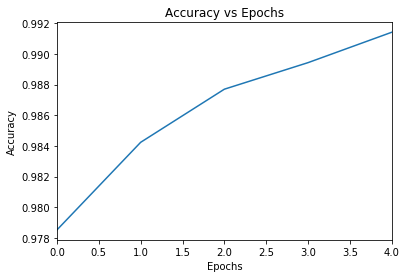

In [49]:
# Run this cell to make the Accuracy vs Epochs plot

acc_plot = frame.plot(y="sparse_categorical_accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

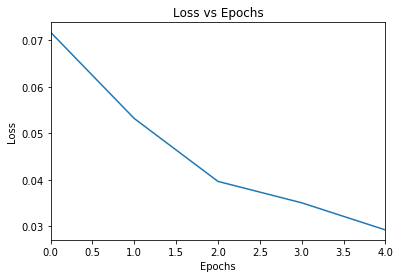

In [50]:
# Run this cell to make the Loss vs Epochs plot

acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [51]:
#### GRADED CELL ####

# Complete the following function. 
# Make sure to not change the function name or arguments.

def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    loss, accuracy = model.evaluate(scaled_test_images, test_labels, verbose=2)
    
    return loss, accuracy
    

In [54]:
# Run your function to evaluate the model

test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_accuracy}")

10000/1 - 4s - loss: 0.0374 - sparse_categorical_accuracy: 0.9854
Test loss: 0.07483343881652035
Test accuracy: 0.9854000210762024


#### Model predictions

Let's see some model predictions! We will randomly select four images from the test data, and display the image and label for each. 

For each test image, model's prediction (the label with maximum probability) is shown, together with a plot showing the model's categorical distribution.

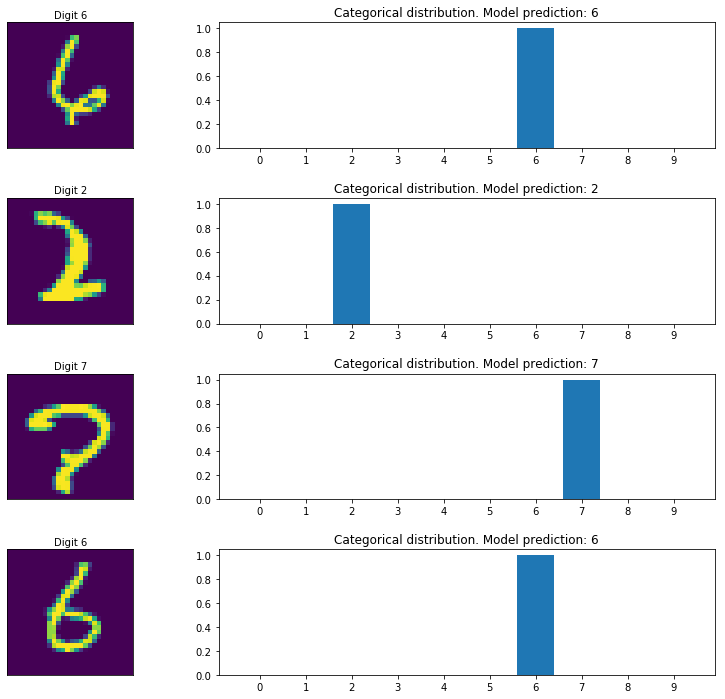

In [55]:
# Run this cell to get model predictions on randomly selected test images

num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

Congratulations for completing this programming assignment! In the next week of the course we will take a look at including validation and regularisation in our model training, and introduce Keras callbacks.